# **Classification**




By Daniel Godden


## **Data Pre-processing for Analysis**

This document outlines the step-by-step process of pre-processing the data for analysis. The data contains cancellation and visit information for students. The steps involve loading, merging, and cleaning the data to prepare it for further analysis or predictive modeling.

### 1. Loading the Datasets

We begin by loading four datasets:
- **Cancellations**: This dataset contains information about students who have canceled their appointments.
- **Visits 2022**, **Visits 2023**, and **Visits 2024**: These datasets contain records of student visits from July to December 2022, all of 2023, and the data available for 2024, respectively.

Each dataset is loaded into a Pandas DataFrame using the `pd.read_csv()` function, which reads the data from CSV files and stores them as structured data for further manipulation.

### 2. Merging the Visit Datasets

The datasets for visits in 2022, 2023, and 2024 are merged together into a single DataFrame. This is done using the `pd.concat()` function, which concatenates these datasets vertically (i.e., adding new rows). After concatenating, the index is reset to ensure a continuous, clean index for the merged data.

### 3. Adding Event Type Column

To differentiate between student visits and cancellations, a new column called `Event Type` is added to both the `cancellations` and `visits_combined` DataFrames. 
- The value `1` is assigned to represent cancellations.
- The value `0` is assigned to represent visits.

This column is important for identifying the nature of the event (visit vs. cancellation) in the combined dataset.

### 4. Preparing for Merging

The `cancellations` and `visits_combined` DataFrames are prepared for merging by renaming key date columns:
- The `Cancellation Date` column in the `cancellations` DataFrame is renamed to `Event Date` to ensure consistency with the `Visit Date` column in the visits data.
- These two datasets are then concatenated together, which combines all visit and cancellation records into a single DataFrame called `events_combined`.

### 5. Creating Additional Columns

Two additional columns are created in the `events_combined` DataFrame:
- **Event Dates**: A duplicate of the `Event Date` column, used to maintain clarity.
- **Event Freq**: A duplicate of the `Event Type` column, where `0` represents a visit and `1` represents a cancellation.

These columns will help in analyzing the frequency and timing of events.

### 6. Merging Events with Cancellations

The `cancellations` DataFrame is merged with the `events_combined` DataFrame on the `Student Number` column using a right join. This ensures that all the visit and cancellation data are combined under each student's record, regardless of whether they canceled or only visited.

### 7. Converting Date Columns to Datetime Format

Several date columns, such as `Event Date`, `Date of Birth`, and `Start Date`, are converted to `datetime` format using the `pd.to_datetime()` function. This step is necessary for performing date-based operations, such as calculating student age or their tenure (time using the service).

### 8. Sorting and Cleaning the Data

The dataset is then sorted by `Student Number` and `Event Date` to ensure that the records for each student are ordered chronologically. Several unnecessary columns, such as `Cancellation Date` and duplicate event type columns, are dropped to clean up the dataset.

### 9. Handling Missing Values

The `Centre ID` column, which may contain missing values, is filled with `0` for missing entries. The data type is then converted to an integer to ensure consistency.

###  10. Feature Engineering: Age Calculation
The **Age** of each student is calculated as the difference between the current date (`datetime.now()`) and the student's `Date of Birth`. This difference is converted into years by dividing the number of days by 365.

### 10. Feature Engineering: Tenure Calculation
**Tenure** is calculated as the number of days a student has been using the service. It is derived by subtracting the `Start Date` from the current date (`datetime.now()`). This feature helps assess whether the length of time a student has been with the organization affects their likelihood of leaving.

### 11. Saving the Processed Data

Finally, the processed data is saved to a new CSV file, `processed_data.csv`, for further analysis or modeling.

In [ ]:
import pandas as pd
from datetime import datetime

# Load the datasets
cancellations_path = 'Task/Cancellations.csv'
visits_2022_path = 'Task/Visits 2022 Jul-Dec.csv'
visits_2023_path = 'Task/Visits 2023.csv'
visits_2024_path = 'Task/Visits 2024 to date.csv'

# Reading the datasets into pandas dataframes
cancellations = pd.read_csv(cancellations_path)

visits_2022 = pd.read_csv(visits_2022_path)
visits_2023 = pd.read_csv(visits_2023_path)
visits_2024 = pd.read_csv(visits_2024_path)

# Merging the visits datasets into a single dataframe
visits_combined = pd.concat([visits_2022, visits_2023, visits_2024])

# Resetting the index after concatenation
visits_combined.reset_index(drop=True, inplace=True)

# Add a column to differentiate between visits and cancellations (0 for visit, 1 for cancellation)
cancellations['Event Type'] = 1  # 1 for cancellation
visits_combined['Event Type'] = 0  # 0 for visit

# Prepare the cancellation and visit dataframes for merge
cancellation_events = cancellations[['Student Number', 'Cancellation Date', 'Event Type']].rename(columns={'Cancellation Date': 'Event Date'})
visit_events = visits_combined[['Student Number', 'Visit Date', 'Event Type']].rename(columns={'Visit Date': 'Event Date'})

# Concatenate the visit and cancellation events into one dataframe
events_combined = pd.concat([visit_events, cancellation_events])

# Reset index after sorting
events_combined.reset_index(drop=True, inplace=True)

# Add two new columns as required:
# 1. 'Event Dates' (same as 'Event Date')
events_combined['Event Dates'] = events_combined['Event Date']

# 2. 'Event Freq' (same as 'Event Type' column: 0 for visit, 1 for cancellation)
events_combined['Event Freq'] = events_combined['Event Type']

# Merging cancellations data with visits data using "Student Number"
df = pd.merge(cancellations, events_combined, on='Student Number', how='right')

# List of date columns that need conversion
date_columns = ['Event Date', 'Date of Birth', 'Start Date']

# Specify the date format you're working with (for example, 'dd/mm/yyyy')
for column in date_columns:
    df[column] = pd.to_datetime(df[column], format='mixed')

# Now sort by 'Student Number' and 'Event Dates'
df.sort_values(by=['Student Number', 'Event Date'], inplace=True)

# Convert 'Date of Birth' and 'Start Date' to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%d/%m/%Y', errors='coerce')
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d/%m/%Y', errors='coerce')

# Calculate 'Age' and 'Tenure'
df['Age'] = (datetime.now() - df['Date of Birth']).dt.days // 365
df['Tenure (Days)'] = (datetime.now() - df['Start Date']).dt.days

churn_df = df.drop(columns=['Cancellation Date','Event Type_x', 'Event Type_y', 'Event Dates'])

# Fill NaN values with 0 (or any other default value), then convert to int
churn_df['Centre ID'] = churn_df['Centre ID'].fillna(0).astype(int)

# save processed data
churn_df.to_csv("processed_data.csv", index=False)

churn_df.head()


,Centre ID,Student Number,Date of Birth,Start Date,Product,Product Type,Event Date,Event Freq,Age,Tenure (Days)
31345,43,P1,2011-06-28,2017-01-07,B-2,Online,2022-07-15,0,13,2837
42962,43,P1,2011-06-28,2017-01-07,B-2,Online,2022-07-21,0,13,2837
56906,43,P1,2011-06-28,2017-01-07,B-2,Online,2022-07-28,0,13,2837
59342,43,P1,2011-06-28,2017-01-07,B-2,Online,2022-07-29,0,13,2837
81857,43,P1,2011-06-28,2017-01-07,B-2,Online,2022-08-11,0,13,2837


In [ ]:
# Print out information on Dataset and the features data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1919619 entries, 31345 to 1612143
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Centre ID       int64         
 1   Student Number  object        
 2   Date of Birth   datetime64[ns]
 3   Start Date      datetime64[ns]
 4   Product         object        
 5   Product Type    object        
 6   Event Date      datetime64[ns]
 7   Event Freq      int64         
dtypes: datetime64[ns](3), int64(2), object(3)
memory usage: 131.8+ MB


## **Data Visualisation of Cancellations by Product Type**

This script visualises the relationship between customer cancellations and different attributes such as **Product Type**, **Age**, and **Tenure** (time spent using the service). It uses the `cancellations` dataset to generate insights about online and in-person cancellations.

## Step 1: Converting Date Columns to Datetime Format

The script begins by converting the `Date of Birth` and `Start Date` columns from strings into `datetime` format. This is necessary for performing date-based calculations like calculating **Age** and **Tenure**.

- The `pd.to_datetime()` function is used, with `format='%d/%m/%Y'` specifying the expected format for the date.
- The `errors='coerce'` parameter ensures that invalid dates are converted to `NaT` (Not a Time) to prevent errors in subsequent calculations.

## Step 2: Calculating Age and Tenure

After converting the date columns to `datetime`, two new features are created:
- **Age**: The difference between the current date and the `Date of Birth`, calculated in years.
- **Tenure**: The number of days between the current date and the `Start Date`, representing how long a customer has been using the service.

These features allow us to analyze the relationship between **Age** and **Tenure** with cancellation behavior.

## Step 3: Visualising the Count of Cancellations by Product Type

A **bar plot** is created to display the number of cancellations for each `Product Type` (Online vs. In-Person). This is done using the `sns.countplot()` function from the **Seaborn** library, which counts the occurrences of each category in the `Product Type` column.

- The plot compares the number of cancellations between online and in-person services, providing insights into which service has more cancellations.

## Step 4: Visualising Age Distribution by Product Type

Next, a **box plot** is generated to visualise the distribution of **Age** for customers who canceled, split by `Product Type`. The `sns.boxplot()` function is used to show the range of ages for each category.

- Box plots display the median, quartiles, and outliers, making it easy to compare the age ranges of customers who canceled online versus in-person services.
- This visualization helps identify whether younger or older customers are more likely to cancel based on the product type they use.

## Step 5: Visualising Tenure Distribution by Product Type

Finally, a **box plot** is created to visualise the distribution of **Tenure** for customers who canceled, also split by `Product Type`. This plot shows how long each customer had been using the service before they canceled.

- The box plot shows the spread of tenure in days for both online and in-person cancellations, allowing you to compare whether customers with a shorter or longer tenure are more likely to cancel.
- This helps assess whether customers who have been using the service for a shorter or longer time are more likely to cancel and whether this trend differs between online and in-person services.

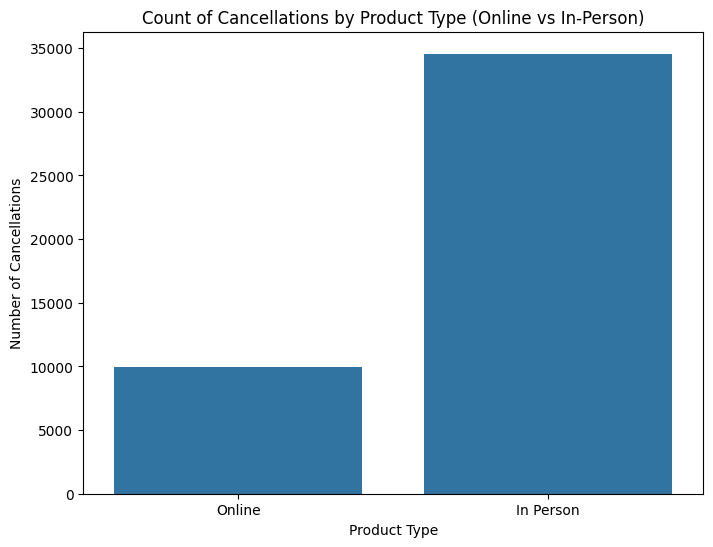

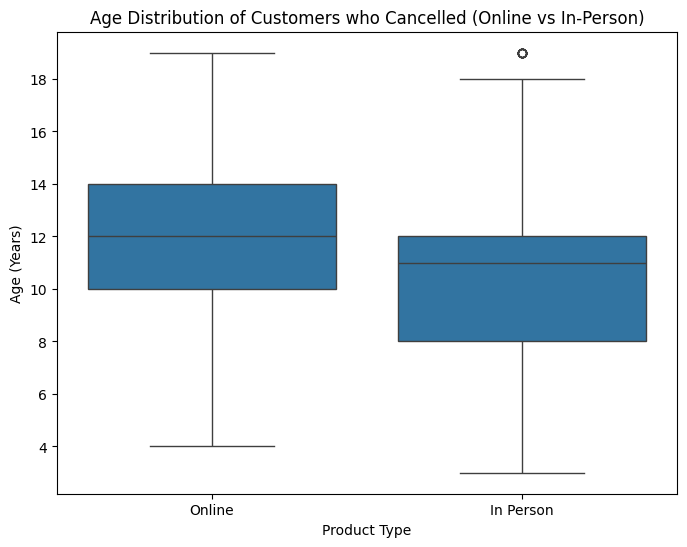

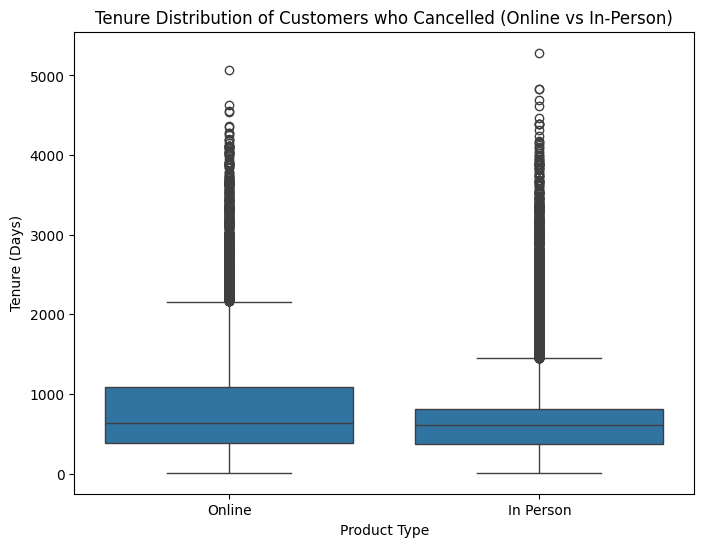

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Convert 'Date of Birth' and 'Start Date' to datetime
cancellations['Date of Birth'] = pd.to_datetime(cancellations['Date of Birth'], format='%d/%m/%Y', errors='coerce')
cancellations['Start Date'] = pd.to_datetime(cancellations['Start Date'], format='%d/%m/%Y', errors='coerce')

# Step 2: Calculate 'Age' and 'Tenure'
cancellations['Age'] = (datetime.now() - cancellations['Date of Birth']).dt.days // 365
cancellations['Tenure (Days)'] = (datetime.now() - cancellations['Start Date']).dt.days

# Step 3: Visualise the count of cancellations for Online vs In-Person

# Bar plot for count of cancellations by Product Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Product Type', data=cancellations)
plt.title('Count of Cancellations by Product Type (Online vs In-Person)')
plt.xlabel('Product Type')
plt.ylabel('Number of Cancellations')
plt.show()

# Step 4: Visualise the distribution of Age for Online vs In-Person cancellations

# Box plot for Age distribution by Product Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Type', y='Age', data=cancellations)
plt.title('Age Distribution of Customers who Cancelled (Online vs In-Person)')
plt.xlabel('Product Type')
plt.ylabel('Age (Years)')
plt.show()

# Step 5: Visualise the distribution of Tenure for Online vs In-Person cancellations

# Box plot for Tenure distribution by Product Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product Type', y='Tenure (Days)', data=cancellations)
plt.title('Tenure Distribution of Customers who Cancelled (Online vs In-Person)')
plt.xlabel('Product Type')
plt.ylabel('Tenure (Days)')
plt.show()

## **Random Forest**

This section explains the process of building a model using a **Random Forest Classifier**. The steps include data preparation, feature engineering, and model building. The goal is to predict whether a student is likely to churn based on various features, such as product type, age, and tenure.

## Step 1: Dropping Date Columns

With `Age` and `Tenure` features the features we will use for analysis, the original datetime columns (`Date of Birth`, `Start Date`, and `Event Date`) can be dropped from the dataset. These columns are no longer useful for the model because they have been transformed into more meaningful features.

## Step 2: Encoding Categorical Variables

Categorical variables like `Product` and `Product Type` are encoded using **one-hot encoding**. This process converts the categorical variables into numerical format so that they can be used in the machine learning model. The `pd.get_dummies()` function is used for this, and the `drop_first=True` argument avoids multicollinearity by dropping one of the dummy columns for each categorical variable.

## Step 3: Preparing the Data for the Model

Next, the dataset is split into **features** (`X`) and the **target variable** (`y`):
- **Features (X)**: All the columns except `Student Number` and `Event Freq` are used as input features.
- **Target (y)**: The `Event Freq` column, which indicates churn (1 = churn, 0 = no churn), is used as the target variable.

## Step 4: Splitting the Data

The data is split into **training** and **testing** sets using `train_test_split()`. The training set is used to train the model, while the testing set is used to evaluate its performance.

- **`test_size=0.2`**: 20% of the data is reserved for testing, while 80% is used for training.
- **`random_state=42`**: This ensures reproducibility by controlling the randomness of the data split.

## Step 5: Building the Random Forest Model

A **Random Forest Classifier** is instantiated and trained on the training data using the `fit()` method. The Random Forest algorithm works by building multiple decision trees and aggregating their predictions to improve accuracy and robustness.

- **`random_state=42`**: Ensures that the random processes within the Random Forest model are reproducible.

## Step 6: Making Predictions

Once the model is trained, it is used to make predictions on the test data:
- **`y_pred`**: Contains the predicted class labels for the test set (0 for no churn, 1 for churn).
- **`y_prob`**: Contains the predicted probabilities for class 1 (churn). This is useful for probability-based metrics like **ROC-AUC**.

The model can now be evaluated using accuracy, precision, recall, F1-score, and ROC-AUC metrics to measure its performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Step 1: Drop the original datetime columns as they are not useful for the model
df = df.drop(columns=['Date of Birth', 'Start Date', 'Event Date']) 

# Step 2: Encode categorical variables (e.g., 'Product', 'Product Type')
df = pd.get_dummies(df, columns=['Product', 'Product Type'], drop_first=True)

# Step 3: Prepare the data for the model
X = df.drop(columns=['Student Number', 'Event Freq'])  # Features
y = df['Event Freq']  # Target (churn)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # For ROC-AUC and probability-based metrics


## **Model Evaluation**

This block of code evaluates the performance of the Random Forest model using several common classification metrics. First, it calculates **accuracy**, which is the proportion of correct predictions out of all predictions, giving an overall sense of the model's performance. However, accuracy alone can be misleading in imbalanced datasets, so additional metrics are used.

**Precision** measures the proportion of positive predictions (students predicted to churn) that were actually correct, helping to reduce false positives. **Recall**, also known as sensitivity, measures the proportion of actual churners that were correctly identified by the model, focusing on minimizing false negatives.

The **F1 Score** is the harmonic mean of precision and recall, providing a balanced metric when both false positives and false negatives are important. Finally, the **ROC-AUC score** measures the model’s ability to distinguish between classes (churn vs. no churn), with a score closer to 1 indicating better classification performance. 

Each metric is calculated using functions from `sklearn.metrics`, and the results are printed with four decimal places to provide a clear, concise summary of the model's effectiveness.


In [6]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9766
Precision: 0.0687
Recall: 0.0018
F1 Score: 0.0035
ROC AUC: 0.1812


## **Further Model Development: Handling Class Imbalance, Model Training, and Evaluation**

To improve model results, steps are taken to handle class imbalance, train machine learning models, and evaluate their performance. The process includes using techniques such as **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the dataset, training models, cross-validation, and adjusting the decision threshold.

## Step 1: Check Class Distribution

The first step is to check the distribution of the target variable (`Event Freq`) to understand whether the dataset is imbalanced. If there are significantly fewer churners compared to non-churners, handling class imbalance is necessary. This imbalance can bias the model toward predicting non-churn.

## Step 2: Handling Class Imbalance Using SMOTE

Since the dataset is imbalanced, **SMOTE** is used to oversample the minority class (churners). SMOTE generates synthetic data points for the minority class, helping to balance the dataset. This ensures the model gets enough data points for churners during training, improving its ability to recognize churn.

## Step 3: Train Models

Two machine learning models are trained:
1. **Random Forest Classifier**: A powerful ensemble learning method that builds multiple decision trees and aggregates their predictions to improve accuracy.
2. **Logistic Regression**: A linear model often used for binary classification tasks such as predicting churn.

Both models are trained on the balanced dataset generated by SMOTE.

## Step 4: Cross-Validation of the Models

To ensure reliable model performance, **cross-validation** is performed using **Stratified K-Folds Cross-Validation**. This method ensures that both churners and non-churners are evenly represented in each fold, preventing overfitting. The **ROC-AUC score** is used as the evaluation metric, measuring the model's ability to distinguish between churners and non-churners.

## Step 5: Splitting the Data for Training and Testing

The dataset is then split into **training** and **testing** sets. The training set is used to fit the model, and the testing set is reserved for evaluating its performance. This helps prevent overfitting and provides a more accurate measure of the model's ability to generalize to unseen data.

## Step 6: Predictions and Model Evaluation

After training, both models (Random Forest and Logistic Regression) are evaluated using various metrics:
- **Accuracy**: The proportion of correct predictions (churn and non-churn) out of all predictions.
- **Precision**: The proportion of churn predictions that were correct (reducing false positives).
- **Recall**: The proportion of actual churners that were correctly identified (reducing false negatives).
- **F1 Score**: The harmonic mean of precision and recall, which balances these two metrics.
- **ROC-AUC**: Measures the model’s ability to distinguish between churners and non-churners. Higher ROC-AUC scores indicate better model performance.

These metrics provide a comprehensive overview of the model’s performance in predicting customer churn.

## Step 7: Adjusting the Decision Threshold

To make the model more sensitive to churn, the decision threshold for the Random Forest model is adjusted from the default (0.5) to a lower value (e.g., 0.3). Lowering the threshold increases the likelihood of predicting churn, which may improve recall (identifying more actual churners), though it could lead to more false positives. The model is re-evaluated using the same metrics after adjusting the threshold to assess whether this improves its performance.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Step 1: Check class distribution
print(churn_df['Event Freq'].value_counts())

# If the data is imbalanced, we can apply SMOTE or upsampling

# Step 2: Handle class imbalance using SMOTE
# Separate features and target
X = churn_df.drop(columns=['Student Number', 'Event Freq'])  # Features
y = churn_df['Event Freq']  # Target (churn)

# Use SMOTE to oversample the minority class (churners)
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

# Step 3: Train models

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_sm, y_sm)

# Train a Logistic Regression Classifier
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_sm, y_sm)

# Step 4: Cross-validate both models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_clf, X_sm, y_sm, cv=skf, scoring='roc_auc')
print(f"Random Forest Cross-Validation ROC AUC: {rf_cv_scores.mean():.4f}")

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_clf, X_sm, y_sm, cv=skf, scoring='roc_auc')
print(f"Logistic Regression Cross-Validation ROC AUC: {lr_cv_scores.mean():.4f}")

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Step 6: Make predictions and evaluate the models

# Predictions and evaluation for Random Forest
y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]  # Probability of churn

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")

# Predictions and evaluation for Logistic Regression
y_pred_lr = lr_clf.predict(X_test)
y_prob_lr = lr_clf.predict_proba(X_test)[:, 1]  # Probability of churn

# Calculate metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Logistic Regression F1 Score: {f1_lr:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_lr:.4f}")

# Step 7: Adjust Decision Threshold

# Let's try adjusting the threshold for Random Forest (default is 0.5)
threshold = 0.3  # Lowering the threshold to make the model more sensitive to churn
y_pred_adjusted_rf = (y_prob_rf >= threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy_adjusted_rf = accuracy_score(y_test, y_pred_adjusted_rf)
precision_adjusted_rf = precision_score(y_test, y_pred_adjusted_rf)
recall_adjusted_rf = recall_score(y_test, y_pred_adjusted_rf)
f1_adjusted_rf = f1_score(y_test, y_pred_adjusted_rf)
roc_auc_adjusted_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Adjusted Random Forest Accuracy: {accuracy_adjusted_rf:.4f}")
print(f"Adjusted Random Forest Precision: {precision_adjusted_rf:.4f}")
print(f"Adjusted Random Forest Recall: {recall_adjusted_rf:.4f}")
print(f"Adjusted Random Forest F1 Score: {f1_adjusted_rf:.4f}")
print(f"Adjusted Random Forest ROC AUC: {roc_auc_adjusted_rf:.4f}")

Event Freq
0    1875123
1      44496
Name: count, dtype: int64


c:\Users\DanielGodden\OneDrive\Documents\Work\customer_churn_model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Cross-Validation ROC AUC: 0.9716


c:\Users\DanielGodden\OneDrive\Documents\Work\customer_churn_model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DanielGodden\OneDrive\Documents\Work\customer_churn_model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver opti

Logistic Regression Cross-Validation ROC AUC: 0.8327
Random Forest Accuracy: 0.9284
Random Forest Precision: 0.9615
Random Forest Recall: 0.8925
Random Forest F1 Score: 0.9257
Random Forest ROC AUC: 0.9788
Logistic Regression Accuracy: 0.7607
Logistic Regression Precision: 0.8412
Logistic Regression Recall: 0.6424
Logistic Regression F1 Score: 0.7285
Logistic Regression ROC AUC: 0.8307
Adjusted Random Forest Accuracy: 0.9160
Adjusted Random Forest Precision: 0.8995
Adjusted Random Forest Recall: 0.9366
Adjusted Random Forest F1 Score: 0.9176
Adjusted Random Forest ROC AUC: 0.9788


In [10]:
# Store the results of the original churn model
original_metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,  
    'roc_auc': roc_auc 
}

# Store the results of the updated churn model
updated_metrics = {
    'accuracy': accuracy_adjusted_rf,  
    'precision': precision_adjusted_rf, 
    'recall': recall_adjusted_rf,  
    'f1': f1_adjusted_rf,  
    'roc_auc': roc_auc_adjusted_rf 
}

# Function to compare the results
def compare_models(original, updated):
    print(f"{'Metric':<15}{'Original':<15}{'Updated':<15}{'Improvement':<15}")
    print("=" * 60)
    for metric in original.keys():
        orig_value = original[metric]
        upd_value = updated[metric]
        improvement = upd_value - orig_value
        print(f"{metric.capitalize():<15}{orig_value:<15.4f}{upd_value:<15.4f}{improvement:<15.4f}")

# Call the function to compare the models
compare_models(original_metrics, updated_metrics)

Metric         Original       Updated        Improvement    
Accuracy       0.9766         0.9160         -0.0606        
Precision      0.0687         0.8995         0.8308         
Recall         0.0018         0.9366         0.9348         
F1             0.0035         0.9176         0.9141         
Roc_auc        0.1812         0.9788         0.7975         


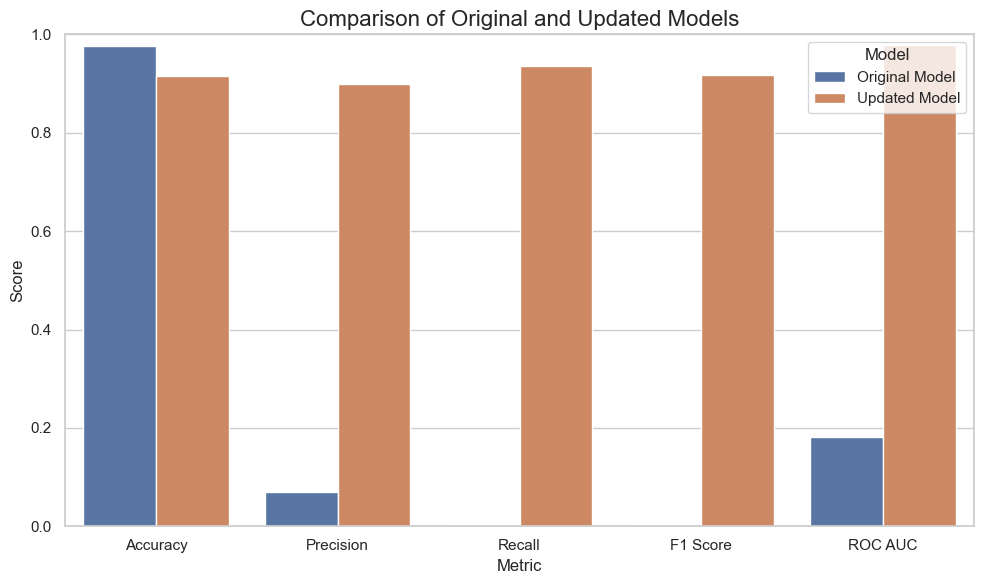

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metrics for both the original and updated models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
original_scores = [0.9766, 0.0687, 0.0018, 0.0035, 0.1812]
updated_scores = [0.9160, 0.8995, 0.9366, 0.9176, 0.9788]

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Metric': metrics,
    'Original Model': original_scores,
    'Updated Model': updated_scores
})

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot bar chart
data_melted = pd.melt(data, id_vars='Metric', var_name='Model', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=data_melted)

# Customize the plot
plt.title('Comparison of Original and Updated Models', fontsize=16)
plt.ylim(0.0, 1.0)  # Adjust the limits as needed
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Score', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
